## Create a new surface dataset 
<br>
<u>Motivation</u>: <br>For the CLASP CPT, we would like to have a few experiments where only a single patch type is used at the ARM site. This function will use a default surfdata file (whatever gets used by default in a single column run - determined by looking at lnd_in file), and then pick out the gridcell that contains the ARM site and modify the PFTs/CFTs in <i>just that one grid cell</i>. <br>
<br>
Indices in CLM can be found here: https://www.cesm.ucar.edu/models/clm/surface.heterogeneity.html <br><br>

In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


## Read in original surfdata file

In [3]:
# Read in original surfdata file that's used in SCAM run
surfFile = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824.nc'
surfdata = xr.open_dataset(surfFile, engine='netcdf4')

# Pick out a few values - lat, lon, and 
lsmlat = surfdata.LATIXY.values
lsmlon = surfdata.LONGXY.values

# Indices of natural PFTs and crop PFTs (CFTs)
natpft = surfdata.natpft.values
cft    = surfdata.cft.values


In [4]:
# ARM site location
armLon = 262.5
armLat = 36.6


### Map out original data (just to get a feel for what it looks like)

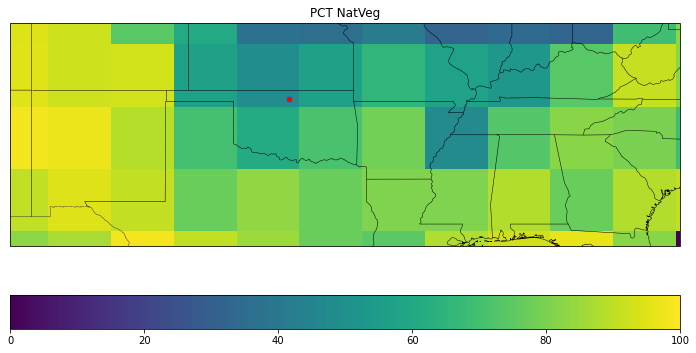

In [5]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot of PCT_NATVEG (percentage of each gridcell that's naturally vegetated)
cplot = ax1.pcolormesh(lsmlon,lsmlat,surfdata.PCT_NATVEG.values)
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT NatVeg')

# Add point for ARM site 
ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


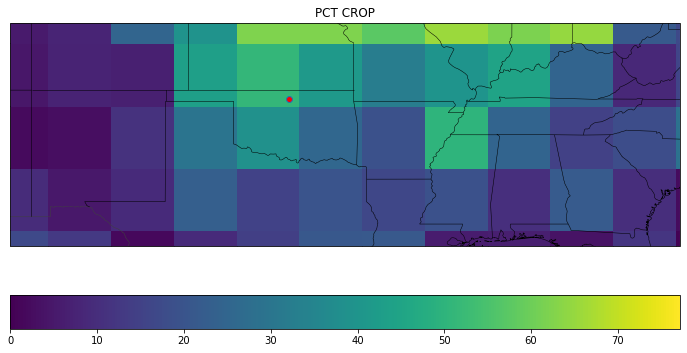

In [6]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot for pct of each gridcell covered by crop types
cplot = ax1.pcolormesh(lsmlon,lsmlat,surfdata.PCT_CROP.values)
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT CROP')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


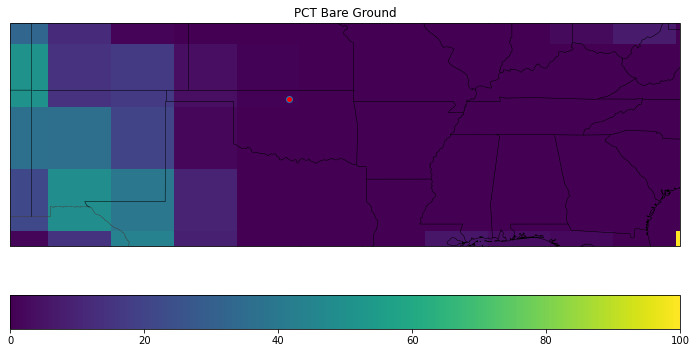

In [7]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot for a single type of PFT: bare ground (index=0)
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[0,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT Bare Ground')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


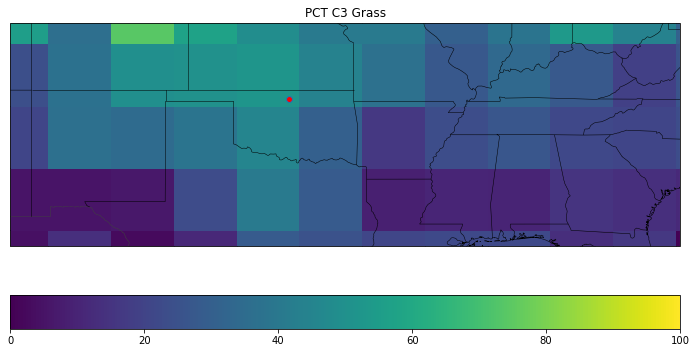

In [8]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot for fraction of gridcell covered with C3 grass 
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[13,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT C3 Grass')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


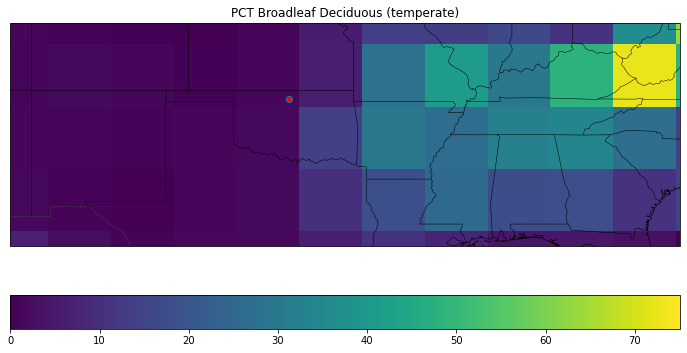

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot with fraction of broadleaf deciduous temperatre trees 
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[7,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT Broadleaf Deciduous (temperate)')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


## Replace PFTs/CFTs at ARM site with prescribed options (a single patch type)

In [10]:
# Get lat/lons around Oklahoma: 

ilat = np.where((lsmlat[:,0]>=armLat-1.2) & (lsmlat[:,0]<=armLat+1.2))[0]
ilon = np.where((lsmlon[0,:]>=armLon-1.2) & (lsmlon[0,:]<=armLon+1.2))[0]


### Case 1: All (and only) bare ground

In [11]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_100 = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_100[ilat,ilon] = 100.0

# Means everything else (pct) has to be 0
pct_crop_0 = np.copy(surfdata.PCT_CROP.values)
pct_crop_0[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_0 = np.copy(surfdata.PCT_CFT.values)
pct_cft_0[0, ilat,ilon] = 100.0
pct_cft_0[1, ilat,ilon] = 0.0

pct_wetland_0 = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_0[ilat,ilon] = 0.0

pct_lake_0 = np.copy(surfdata.PCT_LAKE.values)
pct_lake_0[ilat,ilon] = 0.0

pct_glacier_0 = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_0[ilat,ilon] = 0.0

pct_urban_0 = np.copy(surfdata.PCT_URBAN.values)
pct_urban_0[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_bareGround = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_bareGround[0, ilat,ilon]   = 100.0
pct_nat_pft_bareGround[1::, ilat,ilon] = 0.0

In [12]:
# Santy check: 
#   When pct_crop is zero, what do you do with pct_cft?? 
i0,j0 = np.where(surfdata.PCT_CROP.values==0.0)
len(i0)

print(surfdata.PCT_CROP.values[i0[4300],j0[4300]])
print(surfdata.PCT_CFT.values[:,i0[4300],j0[4300]])


0.0
[100.   0.]


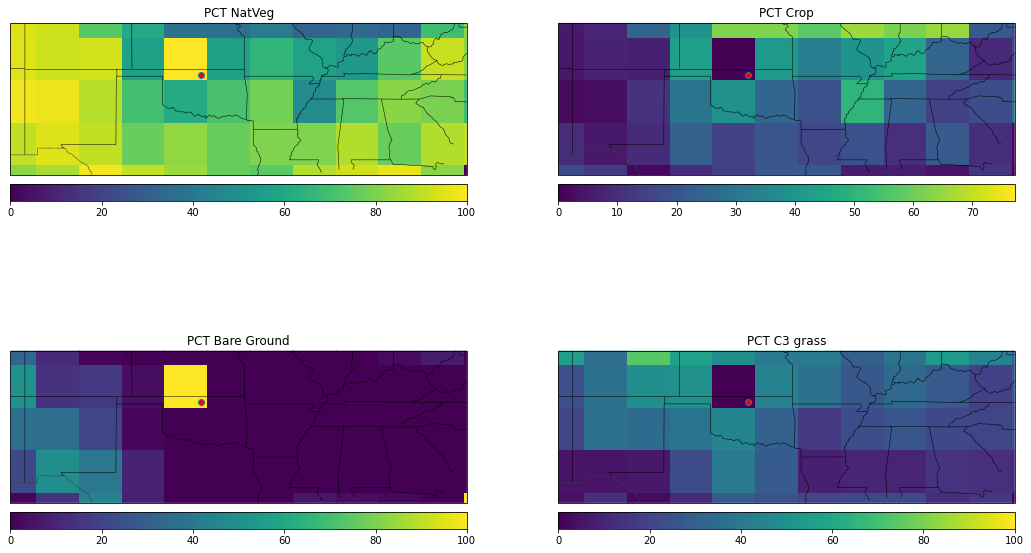

In [13]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_100)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_0)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_bareGround[0,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Bare Ground')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_bareGround[13,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT C3 grass')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


In [14]:
# Create new surfdata with *all and only* bare ground at ARM point
surfdata_allBareGround = surfdata.copy(deep=True)

surfdata_allBareGround['PCT_NATVEG'].values  = pct_natVeg_100
surfdata_allBareGround['PCT_NAT_PFT'].values = pct_nat_pft_bareGround
surfdata_allBareGround['PCT_CROP'].values    = pct_crop_0
surfdata_allBareGround['PCT_CFT'].values     = pct_cft_0
surfdata_allBareGround['PCT_WETLAND'].values = pct_wetland_0
surfdata_allBareGround['PCT_LAKE'].values    = pct_lake_0
surfdata_allBareGround['PCT_GLACIER'].values = pct_glacier_0
surfdata_allBareGround['PCT_URBAN'].values   = pct_urban_0


In [ ]:
## Now convert to new netCDF file 
savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaBareGroundONLY.nc'

surfdata_allBareGround.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


### Case 2: Irrigated crop only

In [15]:
# Set values to indicate just one patch: irrigated crop
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 0.0

pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 100.0

pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 0.0      # non-irrigated
pct_cft_new[1, ilat,ilon] = 100.0    # irrigated

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon] = 0.0
pct_nat_pft_new[1, ilat,ilon] = 100.0


In [16]:
# Santy check: 
#   When pct_natveg is zero, what do you do with pct_nat_pft?? 
i0,j0 = np.where(surfdata.PCT_NATVEG.values==0.0)
len(i0)

print(surfdata.PCT_NATVEG.values[i0[430],j0[430]])
print(surfdata.PCT_NAT_PFT.values[:,i0[430],j0[430]])


0.0
[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.]


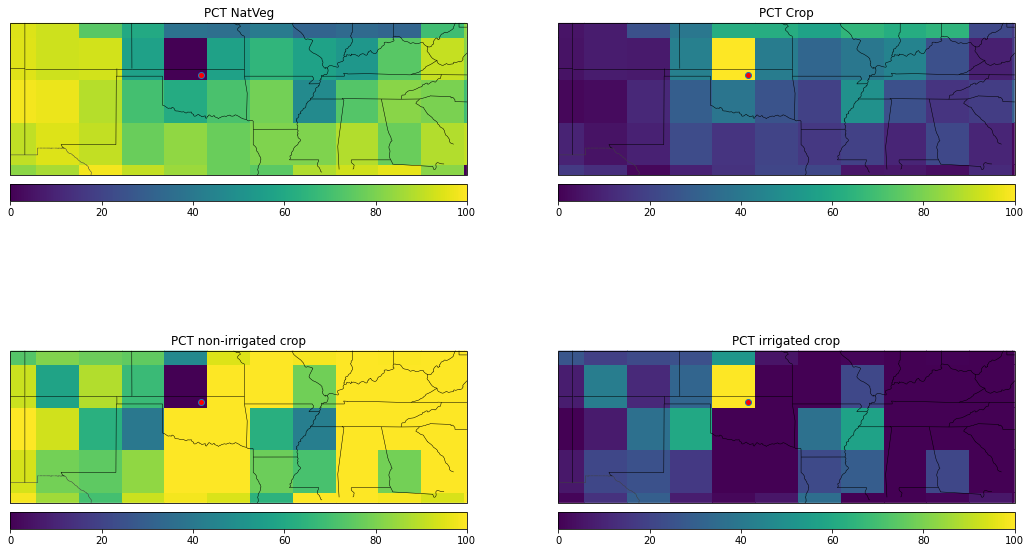

In [17]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_new)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_cft_new[0,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT non-irrigated crop')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_cft_new[1,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT irrigated crop')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())




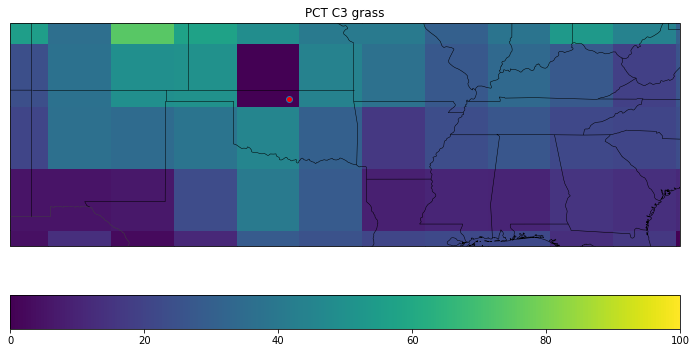

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[13,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT C3 grass')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


In [19]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allIrrigated = surfdata.copy(deep=True)

surfdata_allIrrigated['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allIrrigated['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allIrrigated['PCT_CROP'].values    = pct_crop_new
surfdata_allIrrigated['PCT_CFT'].values     = pct_cft_new
surfdata_allIrrigated['PCT_WETLAND'].values = pct_wetland_new
surfdata_allIrrigated['PCT_LAKE'].values    = pct_lake_new
surfdata_allIrrigated['PCT_GLACIER'].values = pct_glacier_new
surfdata_allIrrigated['PCT_URBAN'].values   = pct_urban_new


In [ ]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaIrrigatedCropONLY.nc'

surfdata_allIrrigated.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')
